#Regression Task
#Dataset : Insurance.csv
#Name : Priya Shrestha
#University ID: 2329818

# 1. Data Understanding:

For the regression, I have used insurance.csv dataset from kaggle. The dataset contains 1338 rows and 7 columns.
The columns are:
1. Age :- This is an integer indicating the age of the primary beneficiary (excluding those above 64 years, since they are generally covered by the government).
2. Sex :- This is the policy holder's gender, either male or female.
3. BMI :- This is the body mass index (BMI), which provides a sense of how over or under-weight a person is relative to their height. BMI is equal to weight (in kilograms) divided by height (in meters) squared. An ideal BMI is within the range of 18.5 to 24.9.
4. Children :- This is an integer indicating the number of children / dependents covered by the insurance plan.
5. Smoker :- This is yes or no depending on whether the insured regularly smokes tobacco.
6. Region :- This is the beneficiary's place of residence in the U.S., divided into four geographic regions - northeast, southeast, southwest, or northwest.
7. Charges​ :- Individual medical costs billed to health insurance
This dataset information was taken from the kaggle.
Here, charges are the dependent variable, I am analysing based on the dependent variables.

In [ ]:
path = "/content/drive/MyDrive/Concepts Of AI/insurance.csv"

In [ ]:
#Necessary imports:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
#Load the dataset and read using pandas
df = pd.read_csv(path)

In [ ]:
#get the information of the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


* **df.info() function gives the details about the dataset including the null count, data type of the column, column names and the memory usuage.**

In [ ]:
df.shape #get the rows and columns of the dataset

(1338, 7)

* **df.shape() gives the tuple of the rows and the columns present in the dataset. Here, I have 1338 rows and 7 columns in my dataset.**

In [ ]:
df.head(5) #get the details from top 5

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


* **df.head(5) gives the top 5 columns details .**

In [ ]:
print("Columns in the dataset: \n")
df.columns #get all the columns from the dataset

Columns in the dataset: 



Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

* **df.column() function is used to get the columns in the dataset. Here, I have ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'] columns.**

In [ ]:
#Get the unique values in the categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    print(f'Unique values in {column}: {df[column].unique()}')

Unique values in sex: ['female' 'male']
Unique values in smoker: ['yes' 'no']
Unique values in region: ['southwest' 'southeast' 'northwest' 'northeast']


* **df.select_dtypes(include=['object']).columns gives the categorical columns of the dataset and the {df[column].unique() gives the unique value in  each categorical column.**

In [ ]:
#Get the unique values in the numerical columns.
num_columns = df.select_dtypes(exclude=['object']).columns
for column in num_columns:
    print(f'Unique values in {column}: {df[column].unique()}')

Unique values in age: [19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39]
Unique values in bmi: [27.9   33.77  33.    22.705 28.88  25.74  33.44  27.74  29.83  25.84
 26.22  26.29  34.4   39.82  42.13  24.6   30.78  23.845 40.3   35.3
 36.005 32.4   34.1   31.92  28.025 27.72  23.085 32.775 17.385 36.3
 35.6   26.315 28.6   28.31  36.4   20.425 32.965 20.8   36.67  39.9
 26.6   36.63  21.78  30.8   37.05  37.3   38.665 34.77  24.53  35.2
 35.625 33.63  28.    34.43  28.69  36.955 31.825 31.68  22.88  37.335
 27.36  33.66  24.7   25.935 22.42  28.9   39.1   36.19  23.98  24.75
 28.5   28.1   32.01  27.4   34.01  29.59  35.53  39.805 26.885 38.285
 37.62  41.23  34.8   22.895 31.16  27.2   26.98  39.49  24.795 31.3
 38.28  19.95  19.3   31.6   25.46  30.115 29.92  27.5   28.4   30.875
 27.94  35.09  29.7   35.72  32.205 28.595 49.06  27.17  23.37  37.1
 23.75  28.975 31.35  33.915 28.785 28.3   37

* df.select_dtypes(exclude=['object']).columns gives the numeric columns of the dataset and the {df[column].unique() gives the unique value in  each numeric column.

#Concluding the columns of dataset:
**Types of variables**

1.   Categorical varibles - sex,smoker,region,children
2.   Quantitative variables -age,bmi,charges.
Children is a discrete variable where as age, bmi, and charges are continous variables.


In [ ]:
df.tail() #give the column details from the top(5)

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [ ]:
df.isnull().sum() #check the presence of missing values in the dataset.

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

* isnull().sum() sums the total presence of missing values in each columns. Here, as there is no presnce of null values, all the columns as 0 null values.

In [ ]:
df.duplicated().sum() #count the duplicate values

1

* duplicated().sum() gave the value 1, it means that there is one row in your DataFrame df that is a duplicate of another row.

In [ ]:
df.drop_duplicates(inplace=True) #dropping the duplicate row.

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe() #summaru statistic of the numeric columns

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


* df.describe() gives the summary statistic of the numeric columns of the dataset, which includes: mean, std, min-max value, median and quartile  of the data.

# Observations on summary statistic:
* The average age is 39 and the maximum age is 64.
* In terms of BMI, the average BMI is 30.66, which falls above the normal standard BMI(18.5 – 24.9), maximum BMI is 53.13, which is extreme obesse case.
* The medical bill on heath insurance is in average of 13279.12, median is 9386, and maximum of 63770.42.
* As the mean is greater than median, it shows that the distribution is positively skewed.
* Customer has average of 1 child and maximum 5 childern.
Customer on an average has 1 child.
* As the mean and median of age, bmi and children is almost equal,it shows they have normal distribution.


# 2. Data Analysis:


**I. Bivariate Analysis**: Bivariate analysis is one type of quantitative analysis. It determines where two variables are related. Here, I am showing how the variables are interrelated with each other.

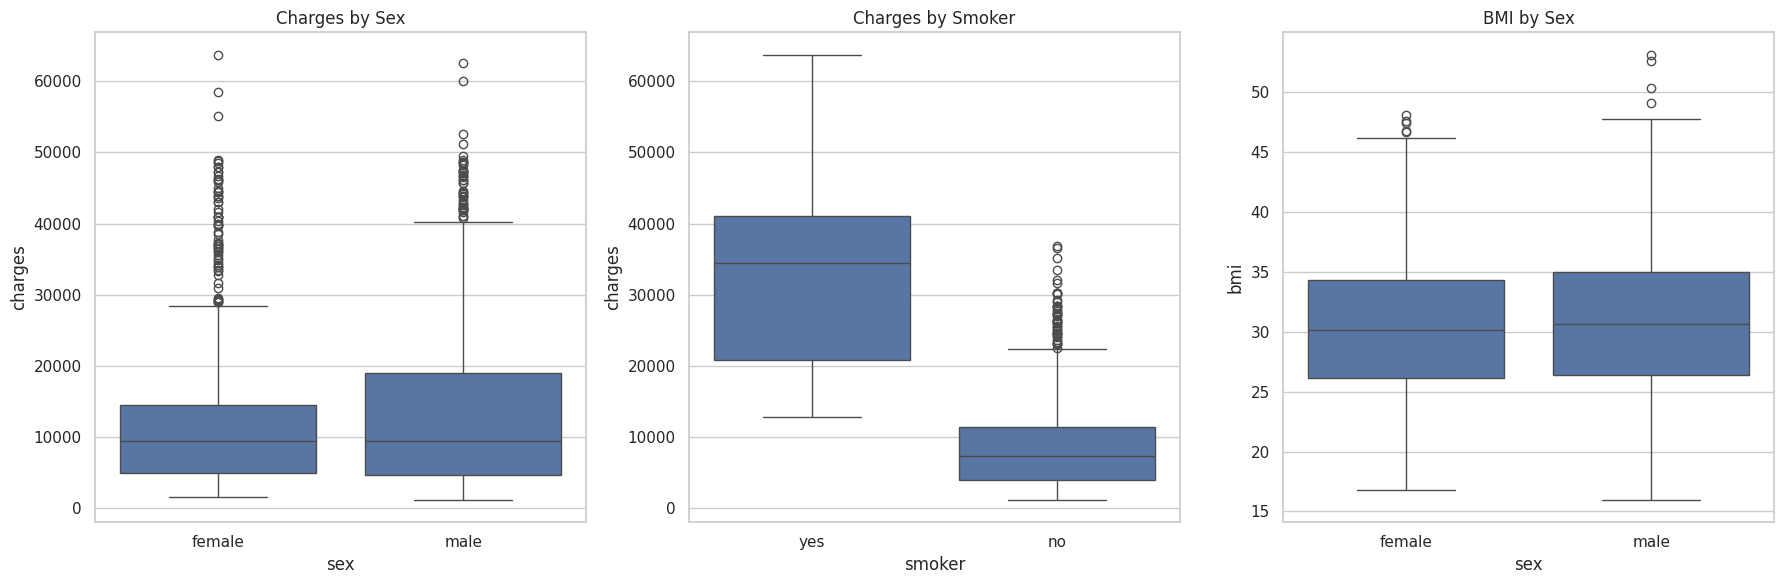

In [ ]:
# Using Subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Making boxplot for charges vs Sex
sns.boxplot(x="sex", y="charges", data=df, ax=axes[0])
axes[0].set_title('Charges by Sex')

# Making boxplot for 'charges' vs  'smoker'
sns.boxplot(x="smoker", y="charges", data=df, ax=axes[1])
axes[1].set_title('Charges by Smoker')

# Making boxplot for 'bmi' vs 'sex'
sns.boxplot(x="sex", y="bmi", data=df, ax=axes[2])
axes[2].set_title('BMI by Sex')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


#Box Plot:
* I have used box plot to see the presence of outliers of charges based on sex and smoker. And BMI based on sex.
* Here, we can see, male has more medical cost on insurance than female and also there are presence of outliers.
* The smokers more charges as compared to non smoker.
* Female has BMI range from around(26-34) and male has BMI range arount 26 to exact 35.

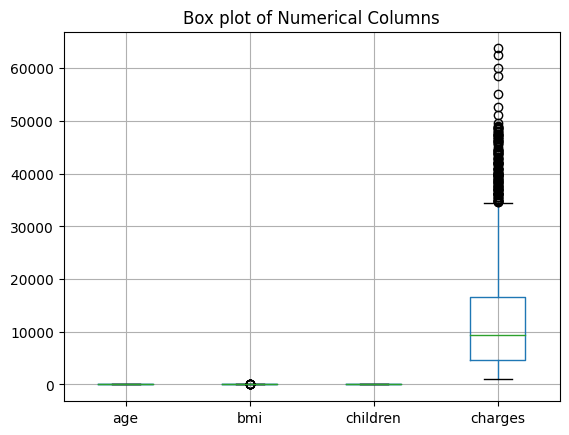

In [ ]:
# Visualize box plots for numerical columns
df.boxplot(column=['age', 'bmi', 'children', 'charges'])
plt.title('Box plot of Numerical Columns')
plt.show()

* Here, I have visualise the numeric columns using box plot.

# 3. Data cleaning And Bivariate Analysis:

In [ ]:
# Remove outliers based on a specific threshold
df_cleaned = df[(df['charges'] < 21000) & (df['bmi'] < 46)]

* Here, I have defined the thresholds for charges and bmi ( 21000 and 46) respectively and get only those where charges is less than 21000 and bmi is less than 46 and put in the new dataframe. This is done so as to remove the outliers.

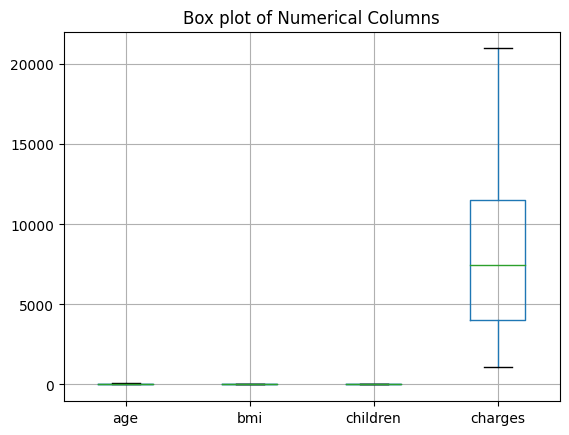

In [ ]:
# visualize boxplot after removing outliers
df_cleaned.boxplot(column=['age', 'bmi', 'children', 'charges'])
plt.title('Box plot of Numerical Columns')
plt.show()

* While visualising the same boxplot after removing the outliers, we can see the outliers has been successfully removed.

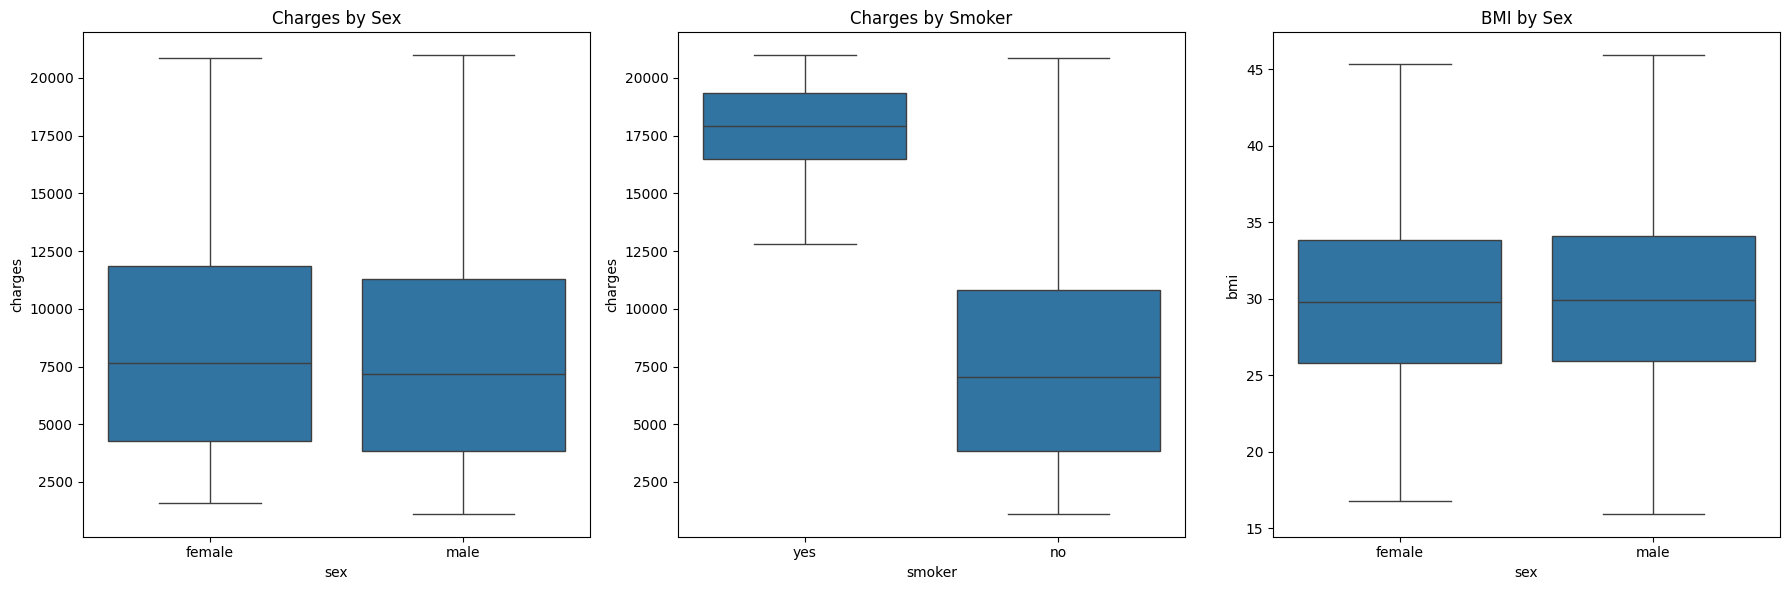

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Making subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# # Making boxplot for charges vs Sex
sns.boxplot(x="sex", y="charges", data=df_cleaned, ax=axes[0])
axes[0].set_title('Charges by Sex')

# # Making boxplot for charges vs  'smoker'
sns.boxplot(x="smoker", y="charges", data=df_cleaned, ax=axes[1])
axes[1].set_title('Charges by Smoker')

# # Making boxplot for Bmi vs S 'sex'
sns.boxplot(x="sex", y="bmi", data=df_cleaned, ax=axes[2])
axes[2].set_title('BMI by Sex')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


* Here, we can see after removal of thge outliers, while ploting boxplot for charges against sex and smoker And bmi and sex, there is no outliers dots.

<ipython-input-27-928f65e42008>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=df_cleaned["age"], y=df_cleaned["charges"], hue=df_cleaned["sex"], ci=None)


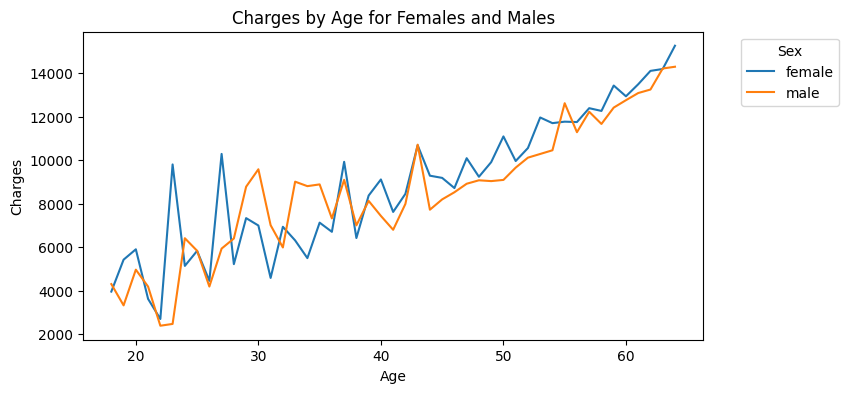

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))

# Use lineplot with 'hue' to differentiate between 'sex'
sns.lineplot(x=df_cleaned["age"], y=df_cleaned["charges"], hue=df_cleaned["sex"], ci=None)

plt.title('Charges by Age for Females and Males')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend(title='Sex', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


* I have used line grapgh to analyse how according to the age group, the charges are changing. Males charges are quite lower than female, in all the age group.

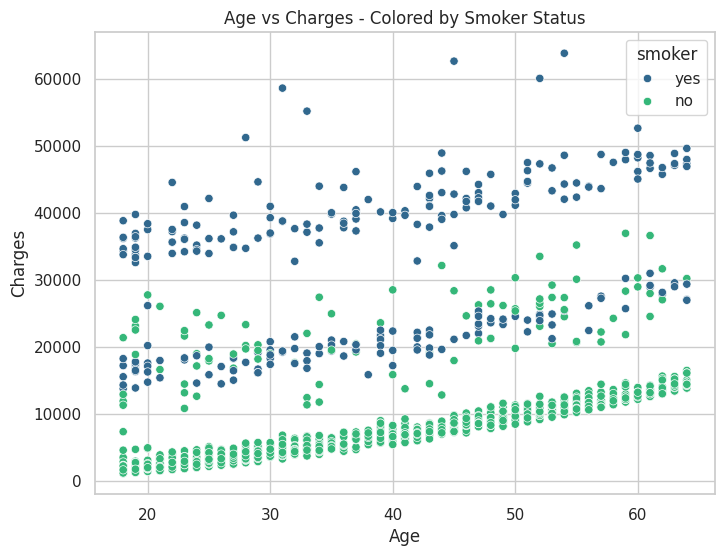

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# Creating a subplot with 1 row and 1 column
fig, axes = plt.subplots(1, 1, figsize=(8, 6))

# Scatter plot for age vs charges
sns.scatterplot(x='age', y='charges', data=df, hue='smoker', palette='viridis', ax=axes)
axes.set_title('Age vs Charges - Colored by Smoker Status')
axes.set_xlabel('Age')
axes.set_ylabel('Charges')

# Show the plot
plt.show()



**Observation from chart: **

* Age and Medical Charges Relationship: There is a general upward trend indicating that medical charges tend to increase with age, which aligns with common expectations. However, it's crucial to note that there is considerable variability in charges at every age, emphasizing that age alone cannot precisely predict medical costs.

* Distinct Clusters: The data points form three discernible clusters, each appearing to follow a line with an ascending slope:

1. Cluster 1 (Healthy Non-Smokers): The largest cluster primarily comprises individuals who are likely "healthy non-smokers." Their medical charges are relatively low compared to the other clusters.

2. Cluster 2 (Mixed Smokers and Non-Smokers): This cluster is a mix of smokers and non-smokers. It's plausible that within this cluster, there are two subgroups: "non-smokers with medical issues" and "smokers without major medical problems." The lines may represent the distinct characteristics of these subgroups.

3. Cluster 3 (Smokers with Major Medical Issues): This cluster exclusively consists of smokers, suggesting that these individuals likely have significant medical issues, possibly exacerbated by smoking.

In summary, the analysis highlights the complexity of factors influencing medical charges, indicating that age alone is insufficient for accurate predictions. The identified clusters underscore the need to consider additional variables, such as smoking status and potential health conditions, to gain a more imformative understanding of the determinants of medical charges.

In [ ]:
#get the summary statistic of the cleaned dataset.
df_cleaned.describe()

,age,bmi,children,charges
count,1069.000000,1069.000000,1069.000000,1069.000000
mean,38.353601,30.092376,1.075772,8153.051666
std,13.949224,5.853846,1.221247,4931.368671
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,25.840000,0.000000,4032.240700
50%,38.000000,29.830000,1.000000,7441.053000
75%,50.000000,33.915000,2.000000,11534.872650
max,64.000000,45.900000,5.000000,20984.093600


# Summary Statistic after the removal of outliers:
* Average age is 38 , min- max age is (18-64) and the median is 38.
* Average BMI is 30.09 and the max bmi is 45.9.
* Average chilldren individual has is 1 and maximum children is 5.
* Average charges is 8153.05 and maximum charges is 20984.

# Univariate analysis:
Univariate analysis involves the individual examination of each variable within a dataset. This analysis assesses the range of values and the central tendency of each variable independently. By scrutinizing the patterns of responses associated with a specific variable, univariate analysis provides insights into its characteristics and distribution.





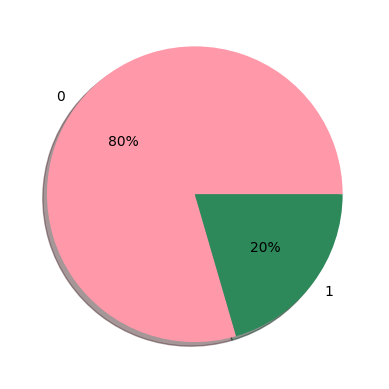

In [ ]:
#to see the composition of Specialisation
out_datareg=pd.DataFrame(df_cleaned.groupby('smoker')['smoker'].count())
colors = ['#ff99aa','#2D885A']
plt.pie(out_datareg['smoker'],labels=['0','1'],autopct='%.0f%%',colors=colors,radius=1,explode = (0, 0),shadow=True)
plt.show()


**Pie chart shows the ratio of the data. Here, this pie chart dipicts the data of smokers (yes, no) as (1, 0). We can see, there is 80% of non-smokers and 20% of smokers, which is good.**

This is a pie chart which gives the information between the regions i have used in my datasets where i have used the four region. among all these 4 region the 2 carries the maximum percentage with 27% and remaining all three carries the same percentage ratio of 24%.

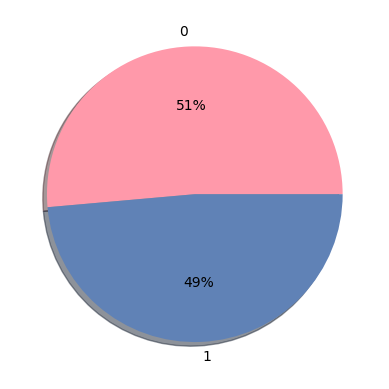

In [ ]:
#to see the proportion of male and female
out_datareg=pd.DataFrame(df_cleaned.groupby('sex')['sex'].count())
colors = ['#ff99aa','#6082B6']
plt.pie(out_datareg['sex'],labels=['0','1'],autopct='%.0f%%',colors=colors,radius=1,explode = (0, 0),shadow=True)
plt.show()

* I have used pie chart to see the proportion of the males and females. There are 51% males and 49% females, indicating that the males are 2% more than female.

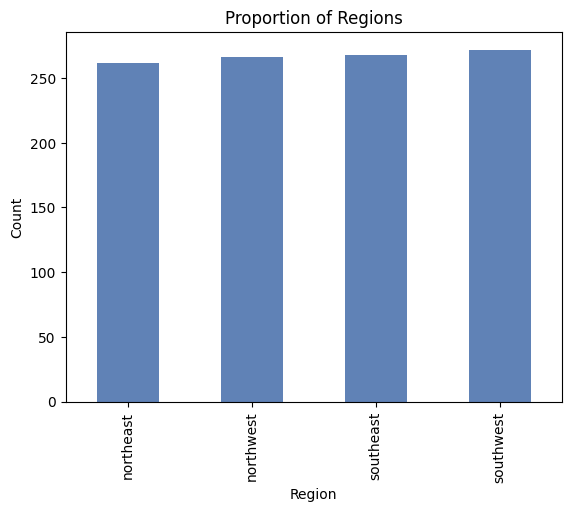

In [ ]:

# Create a DataFrame with the count of each region
out_datareg = pd.DataFrame(df_cleaned['region'].value_counts())

# Sorting the dataframe by index
out_datareg = out_datareg.sort_index()

# Plot the bar
out_datareg.plot(kind='bar', color='#6082B6', legend=False)

# Set labels and title
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Proportion of Regions')

# Show the plot
plt.show()

* I have created a bar graph to see the count according to the region. I have sorted the graph by their indices. Although the counts are quite similar for all the regions, which is just above 250. The northeast has the lowest and the southwest has the highest counts as per the sorted graph.

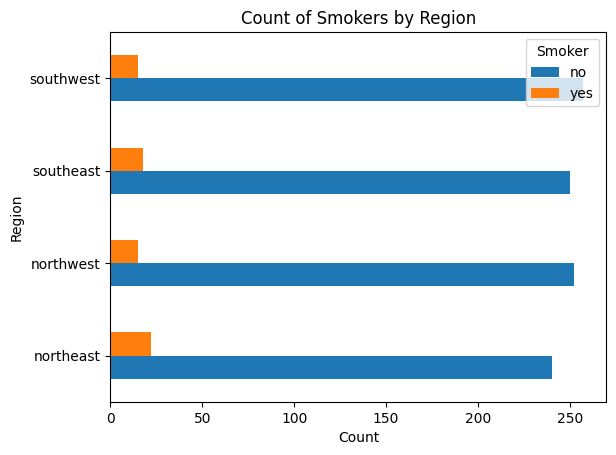

In [ ]:
# Grouping the cleaned DataFrame by 'region' and 'smoker', counting occurrences, and creating a DataFrame with counts
smokers_by_region = df_cleaned.groupby('region')['smoker'].value_counts().unstack().fillna(0)

# Plotting a horizontal bar chart based on the 'smokers_by_region' DataFrame
smokers_by_region.plot(kind='barh')

# Adding labels to the axes
plt.xlabel('Count')  # X-axis label indicating the count of smokers
plt.ylabel('Region')  # Y-axis label indicating the regions

# Setting the title of the plot
plt.title('Count of Smokers by Region')

# Adding a legend to the plot, specifying the title and location
plt.legend(title='Smoker', loc='upper right')

# Displaying the plot
plt.show()


This graph shows a count analysis of smokers based on their regions using a horizontal bar chart.  We can see, for all the 4 regions the count of non-smokers are significantly high, around 250. When we analyse the non-smoker counts, the count is quite similar for all regions. However, northwest has the lowest non-smoker count and the northeast has the highest.

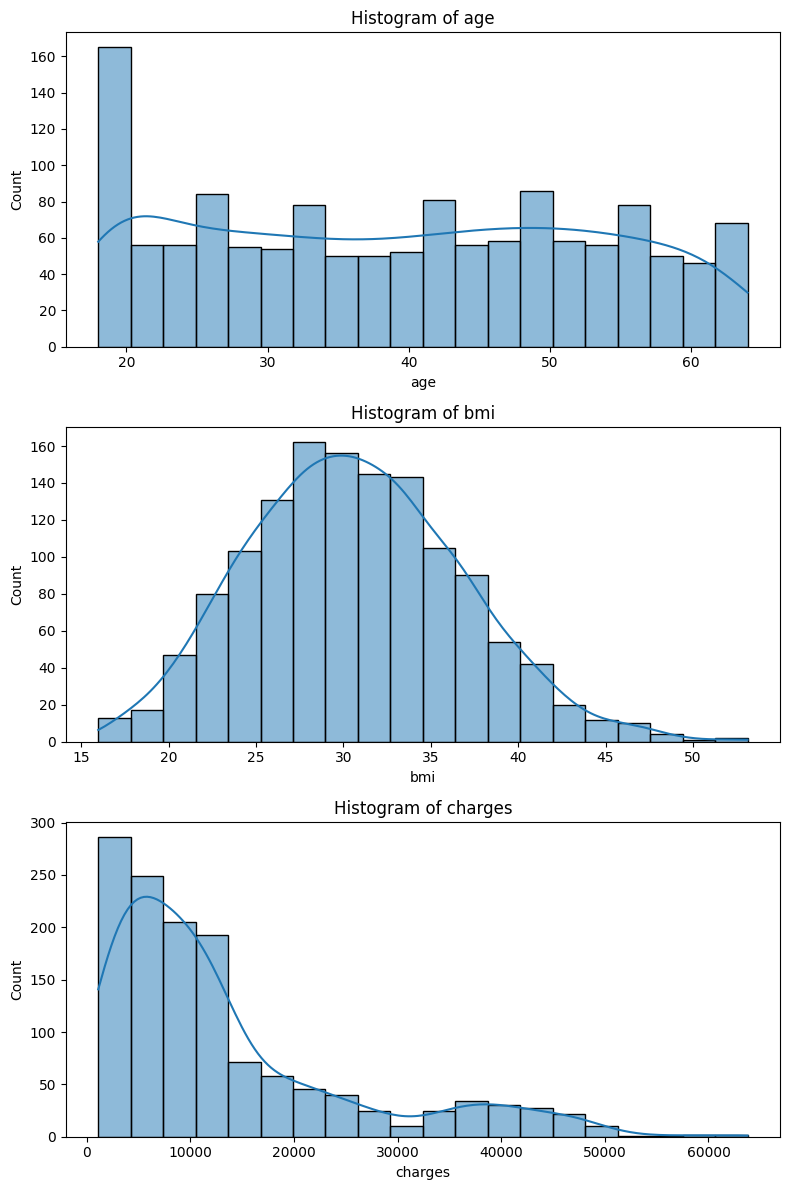

In [ ]:
import matplotlib.pyplot as plt

# Selecting the columns for histogram
selected_columns = ['age', 'bmi', 'charges']

# Creating subplots
fig, axes = plt.subplots(nrows=len(selected_columns), ncols=1, figsize=(8, 4 * len(selected_columns)))

# Iterate through selected columns and create histograms
for i, column in enumerate(selected_columns):
    # Pling the data
    sns.histplot(df[column], ax=axes[i], bins=20, kde=True)

    # Seting plot title
    axes[i].set_title(f'Histogram of {column}')

    # Seting x-axis label
    axes[i].set_xlabel(column)

# Adjusting layout
plt.tight_layout()

# Displaying the subplots
plt.show()


* **Histogram: ** I have created a set of histograms for the specified numerical columns in the DataFrame, visualizing the distribution of data for each selected variable. The histograms are arranged vertically in separate subplots.
* In the **age** histplot, we see that the data of 20 age group is the highest, whereas we can see different similar numbers from around 25-65 group. Threre is the peak at around 80.
* We can see a smooth curve for **bmi**, around 20 ppl has the lowest bmi is around 16-17 and highest no of people has the bmi around 30, and the lowesr no.pf people has the bmi raound 50.
* For the **charges**, count is in descending order from around 1500 to 32000, and it goes higher. people having insurance of 35000 - 50000 is quite similar. While people having low insurance of around 1500-2000 is highest, around 280.

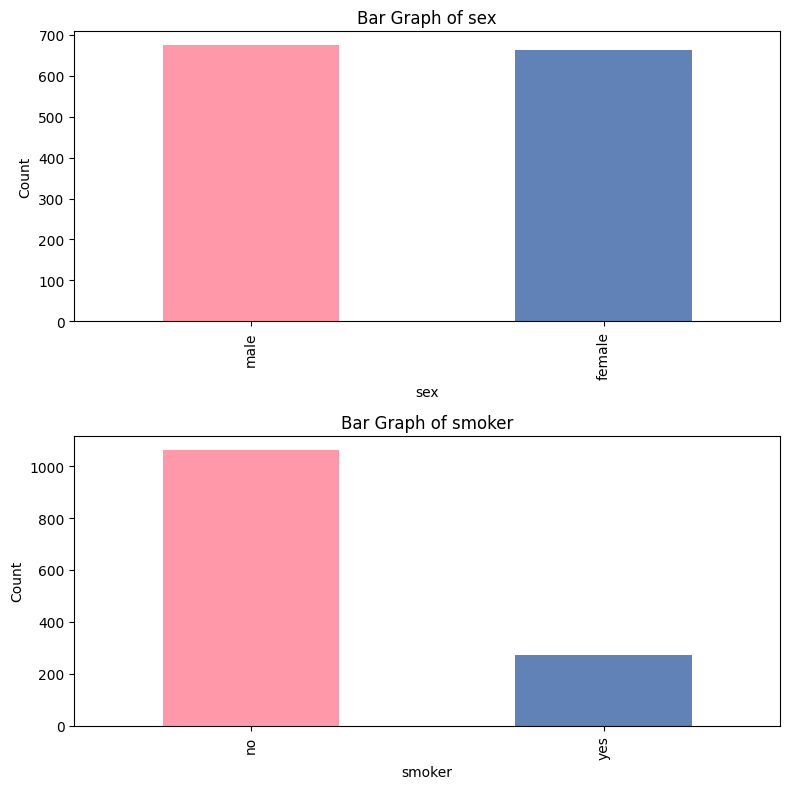

In [ ]:
# Selecting the columns for histogram
selected_columns = ['sex', 'smoker']

# Creating subplots
fig, axes = plt.subplots(nrows=len(selected_columns), ncols=1, figsize=(8, 4 * len(selected_columns)))

# Iterate through selected columns and create histograms
for i, column in enumerate(selected_columns):
   # Count the occurrences of each category
    counts = df[column].value_counts()

    # Plotting the bar graph
    counts.plot(kind='bar', ax=axes[i], color=['#ff99aa', '#6082B6'])

    # Setting plot title
    axes[i].set_title(f'Bar Graph of {column}')

    # Setting x-axis label
    axes[i].set_xlabel(column)

    # Setting y-axis label
    axes[i].set_ylabel('Count')
# Adjusting layout
plt.tight_layout()

# Displaying the subplots
plt.show()

* Here, I have used bar graph for sex and smoker column. From the graph, we can see, The non smoker are around 1100, while smokers are around 300.
* The no.of males and females are similar, however, no.of males are slightly more.

In [ ]:
mean_charges_by_sex=df_cleaned.groupby(df_cleaned.sex).charges.mean()
mean_charges_by_sex

sex
female    8352.427591
male      7954.701195
Name: charges, dtype: float64

* I have grouped the 'charges' column by the 'sex' column and calculating the mean for each group. Calculating the mean charges for males and females separately, for understanding of the average medical charges incurred by individuals of each gender. So, mean_charges_by_sex provides insight into the average charges for both male and female individuals in the cleaned DataFrame. This type of analysis helps in understanding the central tendency of charges based on gender.

#4. Enconding

In [ ]:
#using the get_dummies function from pandas to perform one-hot encoding on the categorical variable 'region'
df_encoded = pd.get_dummies(df_cleaned, columns=['region'], prefix='region', dtype=int)
df_encoded.head(5)

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,female,27.90,0,yes,16884.9240,0,0,0,1
1,18,male,33.77,1,no,1725.5523,0,0,1,0
2,28,male,33.00,3,no,4449.4620,0,0,1,0
4,32,male,28.88,0,no,3866.8552,0,1,0,0
5,31,female,25.74,0,no,3756.6216,0,0,1,0


* Using the get_dummies function from pandas to perform one-hot encoding on the categorical variable 'region'.
* The df_encoded DataFrame  includes new columns representing each unique value in the 'region' column as dummy variables. The values in these columns are binary (0 or 1), indicating the absence or presence of the corresponding region for each row in the original dataset.
* One hot encoding is a technique that we use to represent categorical variables as numerical values in a machine learning model.

In [ ]:
#using LabelEncoder from scikit-learn to encode the 'smoker' column
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_encoded['smoker_encoded'] = label_encoder.fit_transform(df_encoded['smoker'])
df_encoded.sample(5)

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,smoker_encoded
1011,43,male,20.130,2,yes,18767.73770,0,0,1,0,1
190,61,male,31.570,0,no,12557.60530,0,0,1,0,0
838,35,female,23.465,2,no,6402.29135,1,0,0,0,0
927,57,female,20.100,1,no,12032.32600,0,0,0,1,0
239,44,male,38.060,1,no,7152.67140,0,0,1,0,0


* Using LabelEncoder from scikit-learn to encode the 'smoker' column as 0 and 1. his displays a random sample of 5 rows from the DataFrame, showing the original 'smoker' column and the newly added 'smoker_encoded' column.

* Using LabelEncoder from scikit-learn to encode the 'sex' column as 0s and 1s. This displays a random sample of 5 rows from the DataFrame, showing the original 'sex' column and the newly added 'sex_encoded' column.

In [ ]:
df_encoded = df_encoded[[x for x in df_encoded.columns if x not in ['smoker', 'sex']]]
df_encoded.sample(5)

,age,bmi,children,charges,region_northeast,region_northwest,region_southeast,region_southwest,smoker_encoded,sex_encoded
962,63,35.200,1,14474.67500,0,0,1,0,0,0
1162,30,38.830,1,18963.17192,0,0,1,0,0,1
1311,33,26.695,0,4571.41305,0,1,0,0,0,0
841,59,24.700,0,12323.93600,1,0,0,0,0,1
1017,26,34.200,2,3987.92600,0,0,0,1,0,0


* Getting the random 5 sample details for the encode dataframe.

In [ ]:
df_encoded.tail(10)

,age,bmi,children,charges,region_northeast,region_northwest,region_southeast,region_southwest,smoker_encoded,sex_encoded
1326,42,32.87,0,7050.02130,1,0,0,0,0,0
1327,51,30.03,1,9377.90470,0,0,1,0,0,1
1329,52,38.60,2,10325.20600,0,0,0,1,0,1
1330,57,25.74,2,12629.16560,0,0,1,0,0,0
1331,23,33.40,0,10795.93733,0,0,0,1,0,0
1332,52,44.70,3,11411.68500,0,0,0,1,0,0
1333,50,30.97,3,10600.54830,0,1,0,0,0,1
1334,18,31.92,0,2205.98080,1,0,0,0,0,0
1335,18,36.85,0,1629.83350,0,0,1,0,0,0
1336,21,25.80,0,2007.94500,0,0,0,1,0,0


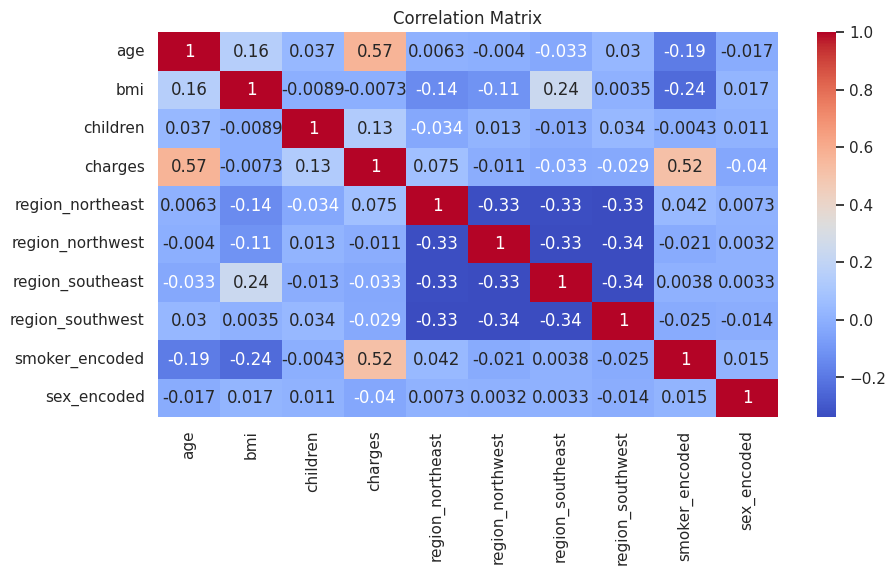

In [ ]:
numr_cols = [x for x in df_encoded.columns if x not in ['age_group']]
corr_matrix = df_encoded[numr_cols].corr()

plt.figure(figsize=(10, 5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


* Heatmap visualizes the pairwise correlations between the selected numerical columns. The color intensity represents the strength and direction of the correlation: warmer colors (reds) indicate positive correlations, cooler colors (blues) indicate negative correlations, and a neutral color (white) indicates no correlation. The numerical annotations provide the actual correlation coefficients.

 **From this, we now know that the "smoker" and "age" columns have the strongest correlation with "charges".**

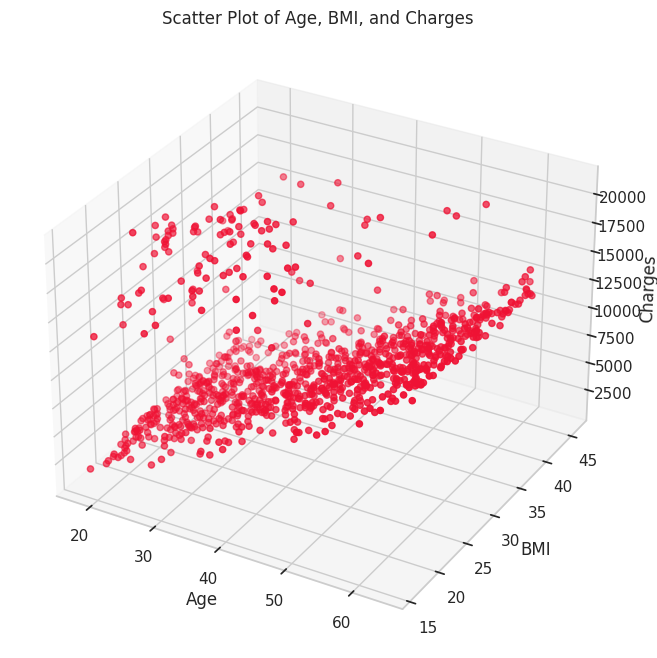

In [ ]:
#getting the number og age, bmi and charges from the dataset
age = df_encoded['age'].values
bmi = df_encoded['bmi'].values
charges = df_encoded['charges'].values
from mpl_toolkits.mplot3d import Axes3D
# Ploting the scores as scatter plot
fig = plt.figure(figsize=(12, 8))
ax =fig.add_subplot(111,projection='3d')
ax.scatter(age, bmi, charges, color='#ef1234') #The x-axis represents age, the y-axis represents BMI, and the z-axis represents medical charges.

ax.set_xlabel('Age')
ax.set_ylabel('BMI')
ax.set_zlabel('Charges')
ax.set_title('Scatter Plot of Age, BMI, and Charges')
plt.show()

#5 Regression:
Regression is a method for understanding the relationship between independent variables or features and a dependent variable or outcome.
Machine learning regression models play a crucial role in predictive analytics by establishing relationships between independent variables and a target outcome. Through training on labeled data, these models learn patterns and correlations, allowing them to make predictions on new, unseen data. This capability is particularly useful for forecasting trends, adapting to market fluctuations, and estimating future outcomes.

#Model 1: Linear Regression

In [ ]:
#getting the dependent variable from the dataset
print("Dependent Variable:\n")
Y=df_encoded['charges']
print(Y)

Dependent Variable:

0       16884.9240
1        1725.5523
2        4449.4620
4        3866.8552
5        3756.6216
           ...    
1332    11411.6850
1333    10600.5483
1334     2205.9808
1335     1629.8335
1336     2007.9450
Name: charges, Length: 1069, dtype: float64


* Charges is the dependent variable which is stored in the variable Y.

In [ ]:
print("Independent Variable:\n")
X=df_encoded.drop(['charges'],axis=1) #select columns otherthan charges as Independent Varaibles
print(X.columns)

Independent Variable:

Index(['age', 'bmi', 'children', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest', 'smoker_encoded',
       'sex_encoded'],
      dtype='object')


# Independent variables:
* Here the independent variables are: ['age', 'bmi', 'children', 'region_northeast', 'region_northwest','region_southeast', 'region_southwest', 'smoker_encoded','sex_encoded'], which is used to evaluate dependent variable.

In [ ]:
df_encoded.head(10)

,age,bmi,children,charges,region_northeast,region_northwest,region_southeast,region_southwest,smoker_encoded,sex_encoded
0,19,27.90,0,16884.9240,0,0,0,1,1,0
1,18,33.77,1,1725.5523,0,0,1,0,0,1
2,28,33.00,3,4449.4620,0,0,1,0,0,1
4,32,28.88,0,3866.8552,0,1,0,0,0,1
5,31,25.74,0,3756.6216,0,0,1,0,0,0
6,46,33.44,1,8240.5896,0,0,1,0,0,0
7,37,27.74,3,7281.5056,0,1,0,0,0,0
8,37,29.83,2,6406.4107,1,0,0,0,0,1
10,25,26.22,0,2721.3208,1,0,0,0,0,1
12,23,34.40,0,1826.8430,0,0,0,1,0,1


* I have finally used head function to get the final dataset info from the top(10).

#Train and Test Split:

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


* Importing the train_test-split from sklearn.model_selection.
* x_train and y_train  are the feature and the target variable for training set.
* x_test and y_test are the feature and the target variable for testing set.

In [ ]:
# Sanity Check:
if x_train.shape[0] ==  y_train.shape[0]:
  print("Progess Further")
else:
  print("X and Y are not created correctly")

Progess Further


* Check if the shape of the feature and target values of the training sets are equal, if yes then only, we can proceed further.

In [ ]:
import numpy as np

print("NaN values in x_train:")
print(x_train.isnull().sum()) #check the null values in x_train

print("\nNaN values in y_train:")
print(y_train.isnull().sum()) #check the null values in y_train


NaN values in x_train:
age                 0
bmi                 0
children            0
region_northeast    0
region_northwest    0
region_southeast    0
region_southwest    0
smoker_encoded      0
sex_encoded         0
dtype: int64

NaN values in y_train:
0


* I have checked if there is any null values in the training sets. I have observed there is no null values in the training set.

In [ ]:
#import the linear Regression for regression from sklearn and Standard Scale for preprocessing(feature scaling.).
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler


sc = StandardScaler() # create an object of StandardScaler
x_train = sc.fit_transform(x_train) # Standardize the features on x_train
x_test = sc.transform(x_test) # Standardize the features on x_test with the mean and std from training set


#create an object of linearRegression
linear_reg = LinearRegression()
# Fit the Linear Regression model on the standardized training data
linear_reg.fit(x_train, y_train)

LinearRegression()

#Explanation:
* I have used the necessary functions from the sklearn.
* For feature scaling, I have used StandardScaler. First of all, the scaling was done on x_train.
* Then the feature standarisation was done on the testing set with the mean and std of the training set.
* Then, on the standarised training data, linear regression was fitted.


In [ ]:
 #use .predict function to make prediction on test data using trained model.
 y_pred = linear_reg.predict(x_test)

# Explaination:
* Predict function was used to generate the prediction on the test data using the trained model(linear Regression Model).
* Then, the value was stored in the variable y_pred.

#Model Evaluation:

In [ ]:
#import the mean_squared_error and  r2_score matrics from sklearn
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


#calculate mean square error and root mean square roor and R2.
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

#print the output
print("Before tuning:")
print("Mean Squared Error: ", mse)
print("Root Mean Squared Error : ",rmse)
print("R-squared: ", r2)

Before tuning:
Mean Squared Error:  6147615.404621875
Root Mean Squared Error :  2479.4385260824424
R-squared:  0.7534822605016889


#Explanation:
* Here, i have calculated the mean square error and root mean square roor and R2 using sklearn matrics.
* The Mean Squared Error is the squared mean of the difference between the actual values and predictable values.
* RMSE is the standard deviation of the errors which occur when a prediction is made on a dataset. This is the same as MSE (Mean Squared Error) but the root of the value is considered while determining the accuracy of the model.
* R-Squred: It is the coeficient of determination. The R squared value lies between 0 and 1 where 0 indicates that this model doesn't fit the given data and 1 indicates that the model fits perfectly to the dataset provided.
* In the result, I have observed the values as:
Before tuning:
Mean Squared Error:  6147615.404621875
Root Mean Squared Error :  2479.4385260824424
R-squared:  0.7534822605016889
*As per the observation: The MSE is 6,147,615.40, which measured the average difference between the predicted charges and actual charges. The RMSE value of around 2,479.44 indicates the average magnitude of the errors made by the model in predicting the charges.R² measures the proportion of variance in the target variable that is explained by the model.

# Hyperparameter Tuning:

In [ ]:
# import Ridge and Grid search cv for hyperparameter tuning
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# define hyperparameters
param_grid_ridge = {'alpha': [0.1, 1.0, 10.0]}

# Creating an instance for grid search
ridge_model = Ridge()
grid_search_ridge = GridSearchCV(ridge_model, param_grid_ridge, cv=5, scoring='r2')
#fit the grid search on training set
grid_search_ridge.fit(x_train, y_train)


# Get the best hyperparameters
best_params_ridge = grid_search_ridge.best_params_
print("Best Hyperparameters :", best_params_ridge)

Best Hyperparameters (Ridge Regression): {'alpha': 0.1}


# Explanation:
* I have done the hyperparameter tuning to maximize model performances without overfitting and reduce the variance error in my model.
* As linear regression doesn't have many hyperparameter, the main hyperparameter in linear regression is the regularization term. So, I have done hyperparameter tuning using cross-validation for the regularization term: Ridge regression. I have found the best hyperparameter  (alpha: 0.1) after grid search.

# Feature Selection : SelectKBest, f_regression




In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression


# Specifying the number of features (k) the number of features as per need
k_best = 5

# Initialize SelectKBest with the f_regression scoring function (suitable for regression tasks)
selector = SelectKBest(f_regression, k=k_best)

# Do the fit and transformation on the training set with selector.
x_train_selected = selector.fit_transform(x_train, y_train)

# Transform the x_test using that selector
x_test_selected = selector.transform(x_test)

# Get the indices of the selected features.
selected_indices = selector.get_support(indices=True)

# Print the result
selected_features = X.columns[selected_indices]
print("Selected Features:", selected_features)


Selected Features: Index(['age', 'children', 'region_northeast', 'region_northwest',
       'smoker_encoded'],
      dtype='object')


# Explaination:
* Feature selection is a crucial step in the machine learning pipeline where we choose a subset of features from our dataset that contribute the most to predicting the target variable. The main goals of feature selection include:
*Reduce Overfitting
* Enhance accuracy
I have used:
* f_regression: F-value between label/feature for regression tasks.
* The, fit the model and transform the featured by selecting top k features based on F values.
* The resulted selected features are: 'age','children','region_northeast','region_northwest','smoker_encoded'. These are the most relevant features for predicting the target varaible.


In [ ]:
#Import the sklearn matrix MAE.
from sklearn.metrics import mean_absolute_error


# fit the model with the best hyperparameter
ridge_after_tuning = Ridge(**best_params_ridge)
ridge_after_tuning.fit(x_train, y_train)

# Make tge prediction on the x test data
y_pred_ridge_after_tuning = ridge_after_tuning.predict(x_test)

# Calculate the MSE, MAE, RMSE AND R2 for the model
mse_ridge_after_tuning = mean_squared_error(y_test, y_pred_ridge_after_tuning)
mae_ridge_after_tuning = mean_absolute_error(y_test, y_pred_ridge_after_tuning)
rmse_ridge = np.sqrt(mse_ridge_after_tuning)
r2_ridge_after_tuning = r2_score(y_test, y_pred_ridge_after_tuning)

# Display results
print("\nRidge Regression - After Tuning:")
print(f"Mean Squared Error: {mse_ridge_after_tuning}")
print(f"Mean Absolute Error: {mae_ridge_after_tuning}")
print(f"Root Mean Squared Error: {rmse_ridge}")
print(f"R-squared: {r2_ridge_after_tuning}")


Ridge Regression - After Tuning:
Mean Squared Error: 6147602.795772228
Mean Absolute Error: 1213.599219098786
Root Mean Squared Error: 2479.43598339869
R-squared: 0.7534827661131996


# Explanation:
* After getting the best hyperparameter, I used that parameter on the model. To make the best final model.
* Evaluation result after tuning:

Mean Squared Error: 6147602.795772228

Mean Absolute Error: 1213.599219098786

Root Mean Squared Error: 2479.43598339869

R-squared: 0.7534827661131996

# Cross Validation Comparision:

In [ ]:
from sklearn.model_selection import cross_val_score #import the cross_val_score from sklearn

#cross validation before the hyperparameter tuning
model_linear_reg_before_tuning = LinearRegression()
cv_scores_before_tuning = cross_val_score(model_linear_reg_before_tuning, x_train, y_train, cv=5, scoring='r2')
print("Cross-Validation Scores (Before Tuning):", cv_scores_before_tuning)
print("Mean R2 Score (Before Tuning):", np.mean(cv_scores_before_tuning))

# Cross-validation scores after tuning
cv_scores_ridge_after_tuning = cross_val_score(ridge_after_tuning, X, Y, cv=5, scoring='r2')
print("\nCross-Validation Scores (After Tuning):", cv_scores_ridge_after_tuning)

# Calculate and display the final mean cross-validation score after tuning
final_cv_score_ridge_after_tuning = np.mean(cv_scores_ridge_after_tuning)
print("Final Mean Cross-Validation Score (After Tuning):", final_cv_score_ridge_after_tuning)

Cross-Validation Scores (Before Tuning): [0.7438581  0.64899284 0.71327176 0.7553829  0.8495278 ]
Mean R2 Score (Before Tuning): 0.742206680651979

Cross-Validation Scores (After Tuning): [0.88595426 0.58188252 0.82784383 0.86198663 0.57231498]
Final Mean Cross-Validation Score (After Tuning): 0.7459964450307954


# Observation on CV:
The hyperparameter tuning process has led to a better-performing linear regression model. The increase in cross-validation scores and mean R2 score suggests that the tuned model is more robust and generalizes well to unseen data. However, the impact of tuning may vary across different datasets, so it's always good practice to validate the results on multiple datasets if possible.

# Comparing the evaluation: Before and After Tuning:

In [ ]:
#display the result of mse, rmse and r2 before tuning
print("Before tuning:")
print("Mean Squared Error: ", mse)
print("Root Mean Squared Error : ",rmse)
print("R-squared: ", r2)

print("\n")
#display the result of mse, rmse and r2 after tuning
print("\nRidge Regression - After Tuning:")
print(f"Mean Squared Error: {mse_ridge_after_tuning}")
print(f"Mean Absolute Error: {mae_ridge_after_tuning}")
print(f"Root Mean Squared Error: {rmse_ridge}")
print(f"R-squared: {r2_ridge_after_tuning}")

Before tuning:
Mean Squared Error:  6147615.404621875
Root Mean Squared Error :  2479.4385260824424
R-squared:  0.7423550733184768



Ridge Regression - After Tuning:
Mean Squared Error: 6147602.795772228
Mean Absolute Error: 1213.599219098786
Root Mean Squared Error: 2479.43598339869
R-squared: 0.7534827661131996


#Observation before and after hyperparameter tuning:
Comparing before and after tuning on evaluation on model, there was no significant change in mse and rmse matrices, however,Ridge regression, after hyperparameter tuning, demonstrates a slightly better performance in terms of R-squared, suggesting improved explanatory power.


#Model 2: Decision Tree Regressor

In [ ]:
#import DecisionTreeRegressor model for regression
from sklearn.tree import DecisionTreeRegressor
Dtree_reg = DecisionTreeRegressor()
#fit the training sets on DecisionTreeRegressor
Dtree_reg.fit(x_train, y_train)

DecisionTreeRegressor()

# Explanation:
* DecisionTreeRegressor breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes.
* Here I have used decision tree regressor as another model for the regression of this dataset using sklearn. Then, I have simply fit the training data on it.

In [ ]:
#preticting the x_test using the desision tree model
tree_pred = Dtree_reg.predict(x_test)

In [ ]:
#calculating mse, rmse and r2 for this model.
mse_tree = mean_squared_error(y_test, tree_pred)
rmse_tree = np.sqrt(mse_tree)
r2 = r2_score(y_test, tree_pred)

#print the result
print("Before Tuning:\n")
print("Mean Squared Error : ",mse_tree)
print("Root Mean Squared Error : ",rmse_tree)
print("R-2 Squared :", r2)

Before Tuning:

Mean Squared Error :  6425103.213316039
Root Mean Squared Error :  2534.7787306421915
R-2 Squared : 0.7423550733184768


#Explanation:

* The model before tuning provides reasonably accurate predictions with a mean squared error (MSE) of around 6425103.21 and a root mean squared error (RMSE) of approximately 2534.78. The model explains about 74.24% of the variability in the charges, as indicated by the R-squared (R²) value.

# Cross-validation using GridSearchCV:

In [ ]:
#import grid search
from sklearn.model_selection import GridSearchCV

# Define hyperparameter for this mode;
param_grid = {'max_depth': [None, 5, 10, 15],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

# Create the instance for the grid search
grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)

# Evaluate the best hyperparameter and print
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 5}


# Explanation:
* I have used gridSearch Cv for the cross validation and get the best hyperparameter.
* I have made a grid of hyperparameters and got the final best hyperparameter : Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 5}
* max_depth=5: the maximum depth that the tree can have from its root to its farthest leaf is five levels.Prevents overfiting.
* min_sample_leaf=4: The minimum sample leaf should be 4. It helps prevent the tree from creating nodes with very few samples, which can lead to overfitting.
* min_sample_split=5: A value of 5 indicates that a node must have at least 5 samples to be eligible for further splitting.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# store Decision Tree Regressor with the best hyperparameters
dt_regressor = DecisionTreeRegressor(**best_params)

# Fit the model on the training data
dt_regressor.fit(x_train, y_train)

# Make predictions on the test data
y_pred_dt_after_tuning = dt_regressor.predict(x_test)

# Evaluate performance metrics on this model
mse_dt_after_tuning = mean_squared_error(y_test, y_pred_dt_after_tuning)
mae_dt_after_tuning = mean_absolute_error(y_test, y_pred_dt_after_tuning)
r2_dt_after_tuning = r2_score(y_test, y_pred_dt_after_tuning)

# Display the results
print("Decision Tree Regressor - After Tuning:")
print("Mean Squared Error:", mse_dt_after_tuning)
print("Mean Absolute Error:", mae_dt_after_tuning)
print("R-squared:", r2_dt_after_tuning)


Decision Tree Regressor - After Tuning:
Mean Squared Error: 6361297.090848052
Mean Absolute Error: 1316.5873950228524
R-squared: 0.7449136818262789


# Explanation:
* Here I have  used the best hyperparameter from above in this model. Fit the model on the training sets and make prediction. Then evaluate the MSE, RMSE and R-square for the model.
#Result:
Decision Tree Regressor - After Tuning:
Mean Squared Error: 6361297.090848052
Mean Absolute Error: 1316.5873950228524
R-squared: 0.7449136818262789

The R-squared value of 0.74 says that the model explains about 74.49% of the variance in the target variable. This indicates a moderate level of predictive performance.

# Comparing cross-validation before and after tuning:

In [ ]:
model_dt_before_tuning = DecisionTreeRegressor(random_state=42)
cv_scores_before_tuning = cross_val_score(model_dt_before_tuning, x_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert negative mean squared error to positive
cv_scores_before_tuning = -cv_scores_before_tuning

# Display the cross-validation scores before tuning
print("\nCross-Validation Scores (Before Tuning):")
print(cv_scores_before_tuning)

# Calculate and display the final mean cross-validation score before tuning
final_cv_score_before_tuning = cv_scores_before_tuning.mean()
print("\nFinal Mean Cross-Validation Score (Before Tuning):", final_cv_score_before_tuning)


print("\n")
# Perform cross-validation with the tuned Decision Tree Regressor
cv_scores_after_tuning = cross_val_score(dt_regressor, x_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert negative mean squared error to positive
cv_scores_after_tuning = -cv_scores_after_tuning

# Display the cross-validation scores after tuning
print("\nCross-Validation Scores (After Tuning):")
print(cv_scores_after_tuning)

# Calculate and display the final mean cross-validation score after tuning
final_cv_score_after_tuning = cv_scores_after_tuning.mean()
print("\nFinal Mean Cross-Validation Score (After Tuning):", final_cv_score_after_tuning)


Cross-Validation Scores (Before Tuning):
[12464031.3246346  13983996.55916078 13849308.6614813  13231064.6376658
 14493587.18595278]

Final Mean Cross-Validation Score (Before Tuning): 13604397.673779052



Cross-Validation Scores (After Tuning):
[6847813.34726432 8371586.02776172 6127723.11449893 7525282.40573184
 3422199.84095214]

Final Mean Cross-Validation Score (After Tuning): 6458920.947241791


# Observation:
* The "Final Mean Cross-Validation Score (After Tuning)" being significantly lower than "Final Mean Cross-Validation Score (Before Tuning)" suggests that your model's generalization performance has improved after hyperparameter tuning.
The individual cross-validation scores (MSE values) for each fold also show a consistent decrease after tuning, indicating better performance across various subsets of the data.
In summary, the hyperparameter tuning process has resulted in a more effective and accurate model, as indicated by the lower mean squared error values in the cross-validation results after tuning compared to before tuning. This improvement suggests that the selected hyperparameters contribute to better generalization and predictive performance.

# Final model: Comparision

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Instantiate Decision Tree Regressor with the best hyperparameters
dt_regressor = DecisionTreeRegressor(**best_params)

# Fit the model on the training data
dt_regressor.fit(x_train, y_train)

# Make predictions on the test data
y_pred_dt_after_tuning = dt_regressor.predict(x_test)

# Evaluate performance metrics
mse_dt_after_tuning = mean_squared_error(y_test, y_pred_dt_after_tuning)
mae_dt_after_tuning = mean_absolute_error(y_test, y_pred_dt_after_tuning)
r2_dt_after_tuning = r2_score(y_test, y_pred_dt_after_tuning)

# Display the results
print("Decision Tree Regressor - After Tuning:")
print("Mean Squared Error:", mse_dt_after_tuning)
print("Mean Absolute Error:", mae_dt_after_tuning)
print("R-squared:", r2_dt_after_tuning)


print("\n")
from sklearn.metrics import mean_absolute_error

# Fit Ridge regression with best hyperparameters on the training set
ridge_after_tuning = Ridge(**best_params_ridge)
ridge_after_tuning.fit(x_train, y_train)

# Predictions on the test set
y_pred_ridge_after_tuning = ridge_after_tuning.predict(x_test)

# Evaluate the model
mse_ridge_after_tuning = mean_squared_error(y_test, y_pred_ridge_after_tuning)
mae_ridge_after_tuning = mean_absolute_error(y_test, y_pred_ridge_after_tuning)
rmse_ridge = np.sqrt(mse_ridge_after_tuning)
r2_ridge_after_tuning = r2_score(y_test, y_pred_ridge_after_tuning)

# Display results
print("\nLinear Regression - After Tuning:")
print(f"Mean Squared Error: {mse_ridge_after_tuning}")
print(f"Mean Absolute Error: {mae_ridge_after_tuning}")
print(f"Root Mean Squared Error: {rmse_ridge}")
print(f"R-squared: {r2_ridge_after_tuning}")

Decision Tree Regressor - After Tuning:
Mean Squared Error: 6361297.090848052
Mean Absolute Error: 1316.587395022853
R-squared: 0.7449136818262789



Linear Regression - After Tuning:
Mean Squared Error: 6147602.795772228
Mean Absolute Error: 1213.599219098786
Root Mean Squared Error: 2479.43598339869
R-squared: 0.7534827661131996


# Comparison and Observation:

* Mean Squared Error (MSE): Linear Regression has a lower MSE (6147602.795772228) compared to Decision Tree Regressor (6361297.090848052). Lower MSE indicates better predictive performance, so Linear Regression performs better in terms of MSE.

* Mean Absolute Error (MAE): Linear Regression also has a lower MAE (1213.599219098786) compared to Decision Tree Regressor (1316.587395022853). Lower MAE indicates better accuracy, so Linear Regression performs better in terms of MAE.

* Root Mean Squared Error (RMSE): Linear Regression has a lower RMSE (2479.43598339869) compared to Decision Tree Regressor (not provided). Lower RMSE indicates better precision, so Linear Regression performs better in terms of RMSE.

* R-squared: Linear Regression has a slightly higher R-squared (0.7534827661131996) compared to Decision Tree Regressor (0.7449136818262789). Higher R-squared indicates better goodness of fit, so Linear Regression performs slightly better in terms of R-squared.

# Conclusion:
Based on the provided metrics, Linear Regression appears to outperform the Decision Tree Regressor in terms of MSE, MAE, RMSE, and R-squared. Therefore, for this specific regression task and dataset, Linear Regression is suggested as the better-performing model after hyperparameter tuning.

